In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
    
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

##### Overview of the problem set

Problem Statement: You are given a dataset ("data.h5") containing:

- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

In [3]:
#Load data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

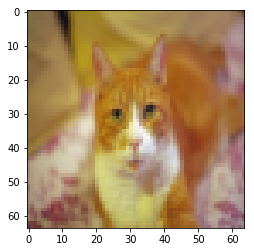

In [4]:
#let us look at an image
plt.imshow(train_set_x_orig[24])

In [5]:
#the dimensions of the image above
train_set_x_orig[44].shape

(64, 64, 3)

In [6]:
print ('the image above has a y value of : {} and it is classified as : {}'.format((train_set_y[:,44]), classes[np.squeeze(train_set_y[:,44])].decode('utf-8')))

the image above has a y value of : [0] and it is classified as : non-cat


In [7]:
#Number of training examples
m_train = train_set_x_orig.shape[0]
#Number of test examples
m_test = test_set_x_orig.shape[0]
#Number of pixels
num_px =train_set_x_orig.shape[1]

In [8]:
#Information printing
print('Number of training examples: {}'.format(m_train))
print('Number of test examples: {}'.format(m_test))
print('Number of pixels for the height and width: {}'.format(num_px))
print('The dimensions for the training set is: {} '.format(train_set_x_orig.shape))
print('The dimensions for the test set is : {}'.format(test_set_x_orig.shape))
print('The dimensions for Y values of the training set is: {}'.format(train_set_y.shape))
print('The dimensions for Y values of the test set is: {}'.format(test_set_y.shape))

Number of training examples: 209
Number of test examples: 50
Number of pixels for the height and width: 64
The dimensions for the training set is: (209, 64, 64, 3) 
The dimensions for the test set is : (50, 64, 64, 3)
The dimensions for Y values of the training set is: (1, 209)
The dimensions for Y values of the test set is: (1, 50)


##### processing the training and test set

We now need to flatten the image from (M,num_px, num_px, 3) to [(num_px * num_px * 3), M] 

In [9]:
#reshape
train_set_x_flatten =  train_set_x_orig.reshape(209,-1).T
test_set_x_flatten =  test_set_x_orig.reshape(50,-1).T

In [10]:
print('The shape of the preprocessed training set . is : {}'.format(train_set_x_flatten.shape))
print('The shape of the preprocessed test . is : {}'.format(test_set_x_flatten.shape))

The shape of the preprocessed training set . is : (12288, 209)
The shape of the preprocessed test . is : (12288, 50)


We are now going to standardize by dividing every element by 255. Red, Green, And blue values range from 0 to 255 so if we divide by 255 we get a value from 0 to 1 that indicates the saturation of that color.

In [11]:
#Standardize
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

### Build the algorithm 

In [12]:
#activation function 
def sigmoid(z):
    s = 1/(1+ np.exp(-z))
    return s

In [13]:
#define the weights and bias
def initialize_with_zeros(dim):
    
    w = np.zeros(dim)
    b = 0
    
    return w,b

#Test
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [0. 0.]
b = 0


In [14]:
#propogate
def propagate(w,b,X,Y):
    #define
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X) + b)
    cost = - np.sum((Y * np.log(A)) + ((1-Y) * np.log(1-A))) / m
    dw = np.dot(X, (A - Y).T)/m
    db = np.sum(A - Y)/m
    cost = np.squeeze(cost)
    grads = {"dw": dw, "db": db}
    #return
    return grads, cost

In [15]:
#test
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propogate(w,b,X,Y)
grads, cost

NameError: name 'propogate' is not defined

#### optimization 

In [16]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        #run the forward and backward propogation for this epoch
        grads, cost = propagate(w, b, X, Y)
        
        #gradients for weight and bias
        dw = grads["dw"]
        db = grads["db"]
        
        #update the weight and bias to the new weight and bias value
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        #record the cost
        if i % 100 == 0:
            costs.append(cost)
            print(cost)
        
        #print the cost every 100 training examples
        if print_cost and i %100 == 0:
            print('cost after {} iterations is {}'.format(i, cost))
            
    #updated parameters and gradients
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
        
    return params, grads, costs

In [17]:
#Test

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

5.801545319394553
w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067654


#### Predict

In [18]:
def predict(w, b , X):
    #number of training examples
    m = X.shape[1]
    
    # we want w to be num_px for the height * num_px for the width * color channels
    w = w.reshape(X.shape[0],1)
    
    # we want y hat to be a zero vector with dimensions of 1 * the number of training examples
    y_prediction = np.zeros((1,m))
    
    
    #the activation function which in this case is the sigmoid function 
    A = sigmoid(np.dot(w.T,X) + b)
    
    #for every prediction in the training set i
    for i in range(A.shape[1]):
        y_prediction[0,i] = 0 if A[0,i] <= 0.5 else 1
        pass
    
    return y_prediction

#### Merging all the functions into a model

In [24]:
#model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    #initialize the weights and biases, we're going to start with 0 there will be 12,282 weights 1 for every x
    w , b = np.zeros((X_train.shape[0],1)), 0
    
    #Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    #updated learning rate after applying w - (learning_rate * dw) and b - (learning_rate * db)
    w = parameters["w"]
    b = parameters["b"]
    
    #predict test and train train examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    
    #print the accuracy
    print("Train accuracy : {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100 ))
    print("Test accuracy : {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100 ))
    
    #dictionary with information
    d = {
    "costs" : costs,
    "Y_prediction_test": Y_prediction_test,
    "Y_prediction_train" : Y_prediction_train,
    "w" : w,
    "b" : b,
    "learning_rate" : learning_rate,
    "num_iterations" : num_iterations
    }
    
    #return the dictionary
    return d

In [25]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

0.6931471805599453
cost after 0 iterations is 0.6931471805599453
0.5845083636993086
cost after 100 iterations is 0.5845083636993086
0.4669490409465547
cost after 200 iterations is 0.4669490409465547
0.37600686694802077
cost after 300 iterations is 0.37600686694802077
0.33146328932825136
cost after 400 iterations is 0.33146328932825136
0.303273067474383
cost after 500 iterations is 0.303273067474383
0.27987958658260487
cost after 600 iterations is 0.27987958658260487
0.26004213692587574
cost after 700 iterations is 0.26004213692587574
0.2429406846779662
cost after 800 iterations is 0.2429406846779662
0.2280042225672607
cost after 900 iterations is 0.2280042225672607
0.21481951378449637
cost after 1000 iterations is 0.21481951378449637
0.20307819060644985
cost after 1100 iterations is 0.20307819060644985
0.19254427716706857
cost after 1200 iterations is 0.19254427716706857
0.18303333796883509
cost after 1300 iterations is 0.18303333796883509
0.17439859438448882
cost after 1400 iterations

##### A misclassified example

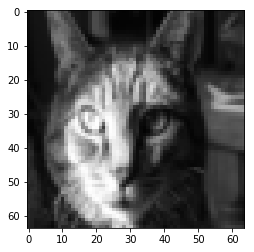

In [26]:
index = 30
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))

In [27]:
print("y = {}".format(test_set_y[0,index]))
print("My algorithm predicted it is a {}".format((classes[int(d['Y_prediction_test'][0,30])].decode())))

y = 1
My algorithm predicted it is a non-cat


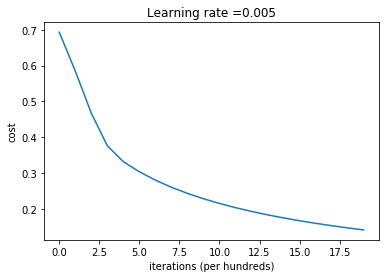

In [28]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()